# About Dataset & Features

**About Dataset**

A manager at the bank is disturbed with more and more customers leaving credit card services. 
He ask us predict who is gonna get churned so we can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.'

**Features Description**

1. Client number : Unique identifier for the customer holding the account
2. Attrition_Flag : Account is closed or not.(Existing Customer / Attrited Customer.
3. Customer_Age : Cusomer's age in years.
4. Gender : Male/Female.
5. Dependent_Count : Number of Dependents.
6. Education_Level : Education Qualification of the account holder.
7. Marital_status : Married, Single, Divorced, Unkown.
8. Income_Categpry : Annual Income Category of the account holder.
9. Card_Category : Type of card(Blue, Silver, Gold, Platinum)
10. Credit_limit : Credit limit on credit card

**These are the columns will be used during the analysis. **

Link dataset: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/download?datasetVersionNumber=1

Resource: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

# Import, read, clean Data & Churnrate


In [1]:
import numpy as np, pandas as pd

In [2]:
df = pd.read_csv ('/content/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
df = df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
df.describe(include="O")

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [7]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
from pandas.api.types import is_numeric_dtype
import string
alphabet = string.ascii_letters + string.digits #+string.punctuation


for i in df.columns:
  if is_numeric_dtype(df[i]) == False and df[i].str.strip(alphabet).astype(bool).any() == True:
    print(i, df[i].str.strip(alphabet).unique())

Attrition_Flag [' ']
Education_Level [' ' '' '-']
Income_Category ['$60K - $' ' than $' '$80K - $' '$40K - $' '$120K +' '']


<Axes: >

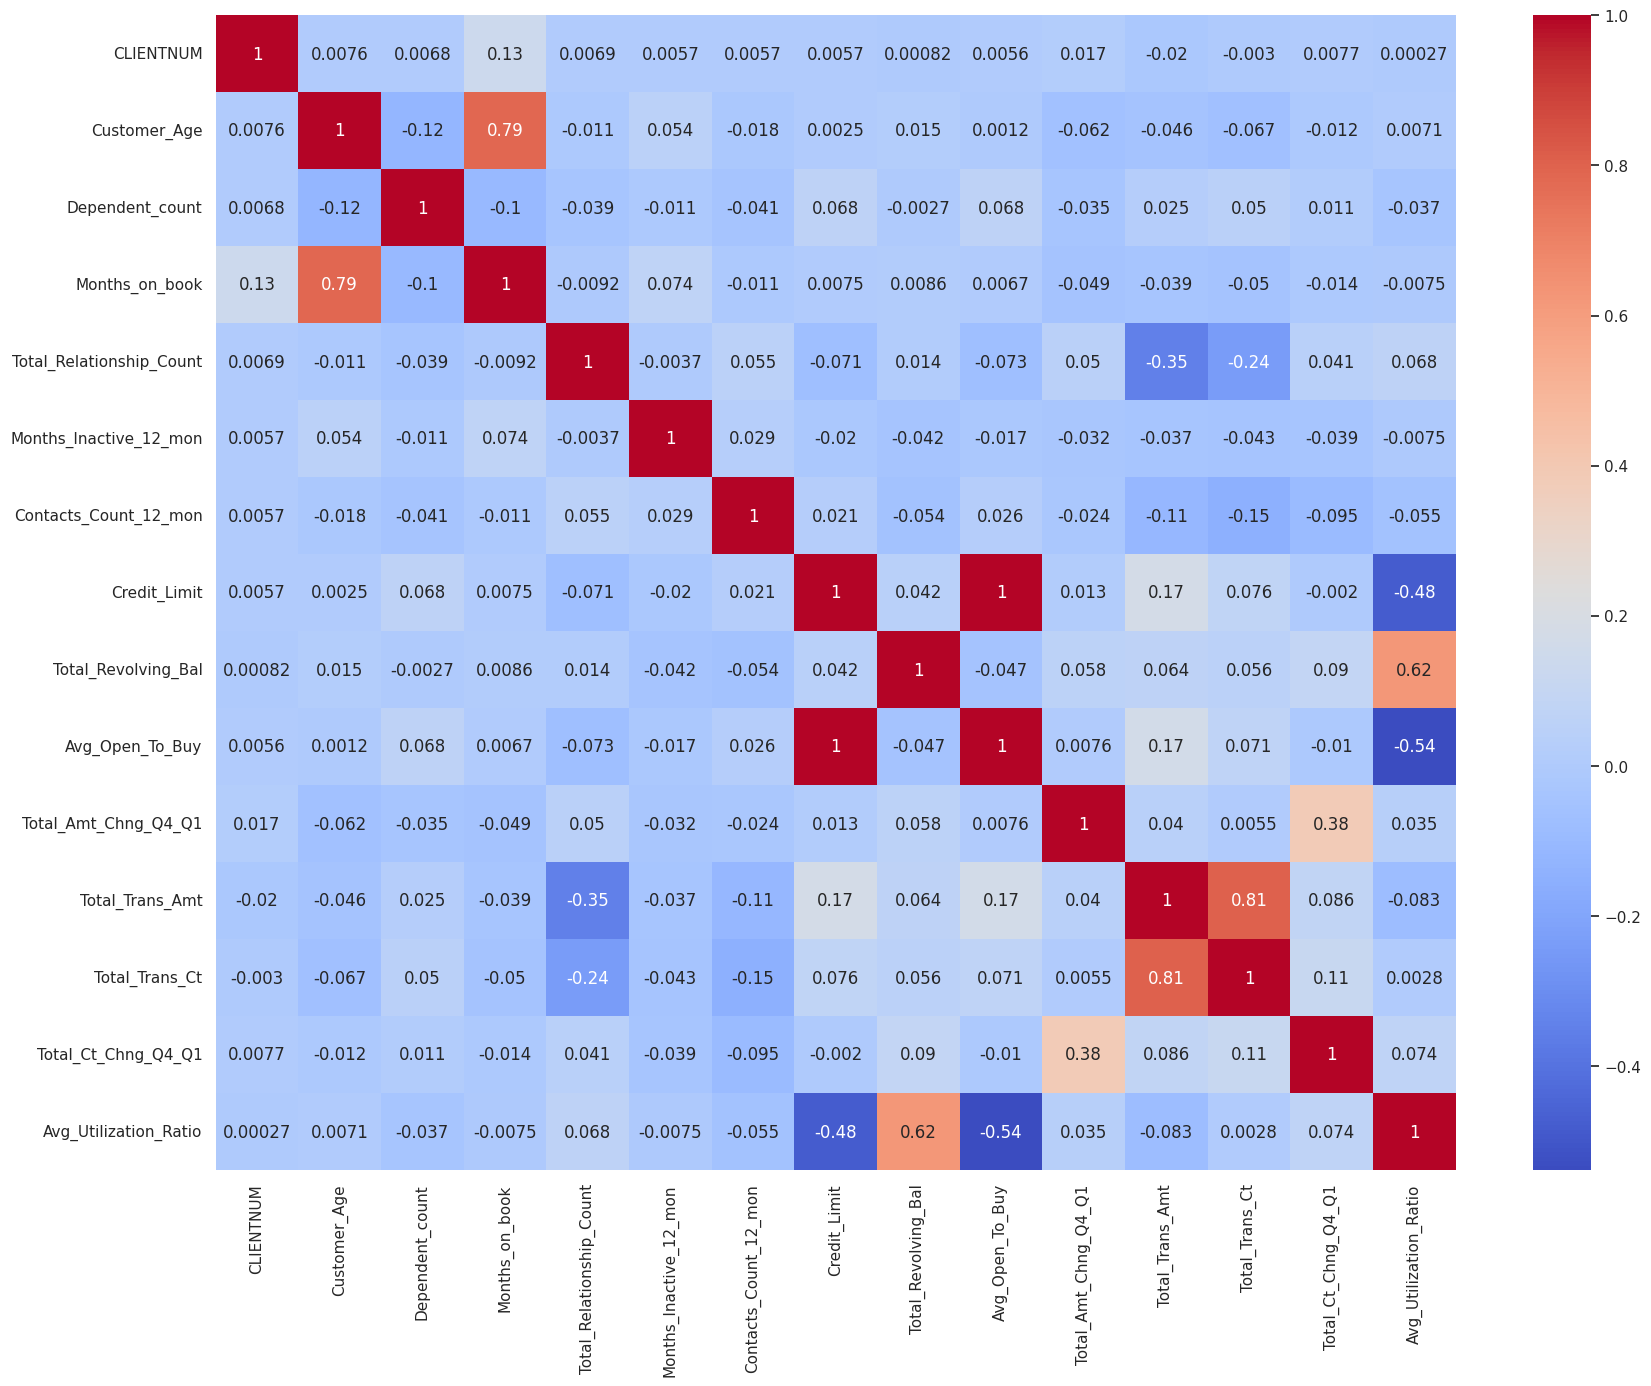

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()  
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [10]:
#ta thấy credit_limit và Avg_Open_To_Buy có liên quan
# total_trans_AMT và total_trans_ct có liên quan
# credit_limit, Total_Revolving_Bal và Avg_Open_To_Buy liên quan tới AVG_Utilization_Ratio

In [11]:
counts = df['Attrition_Flag'].value_counts()
churn_rate = (counts[1] / (counts[0] + counts[1])) * 100
print(churn_rate)
#Ta vừa tính ra được tỉ lệ churn rate là 16.06%

16.065962279055988


# Visualize Data


Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


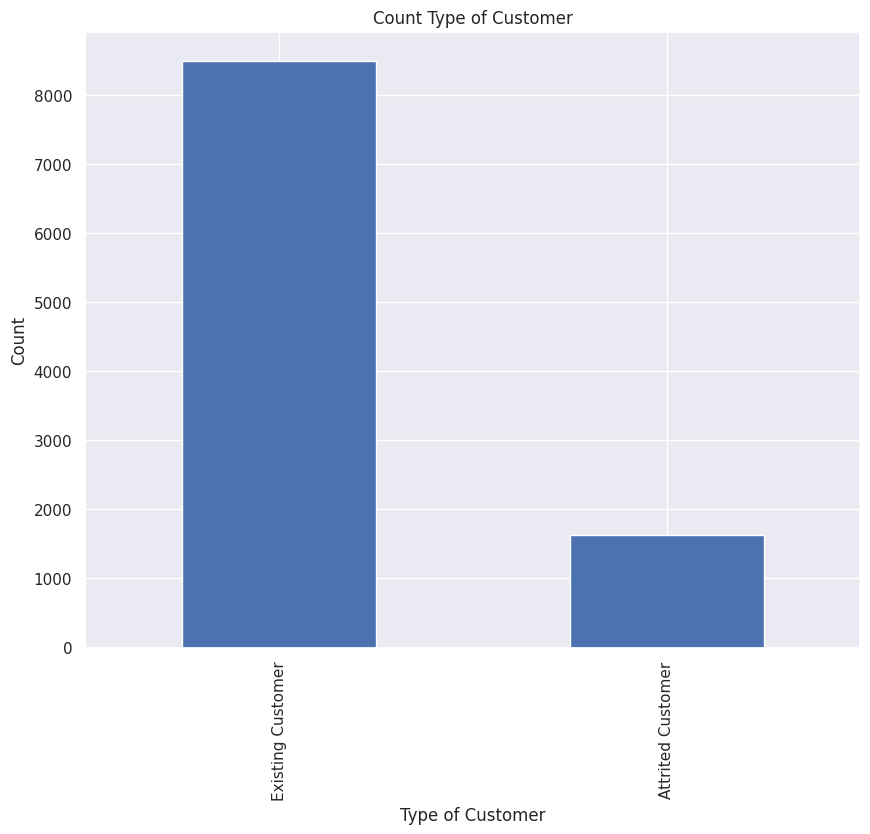

In [12]:
print(df['Attrition_Flag'].value_counts())
plt.figure(figsize=(10,8))
df['Attrition_Flag'].value_counts().plot(kind = "bar")
plt.style.use("fast")
plt.title("Count Type of Customer")
plt.xlabel("Type of Customer")
plt.ylabel("Count")
plt.show()
plt.close()
# Ta dễ dàng nhìn thấy sự chênh lệch data rất lớn giữa số lượng khách hàng hiện hữu và  số lượng khách hàng ngừng sử dụng dịch vụ

<ipython-input-13-5ac43cfc2fe8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-muted")


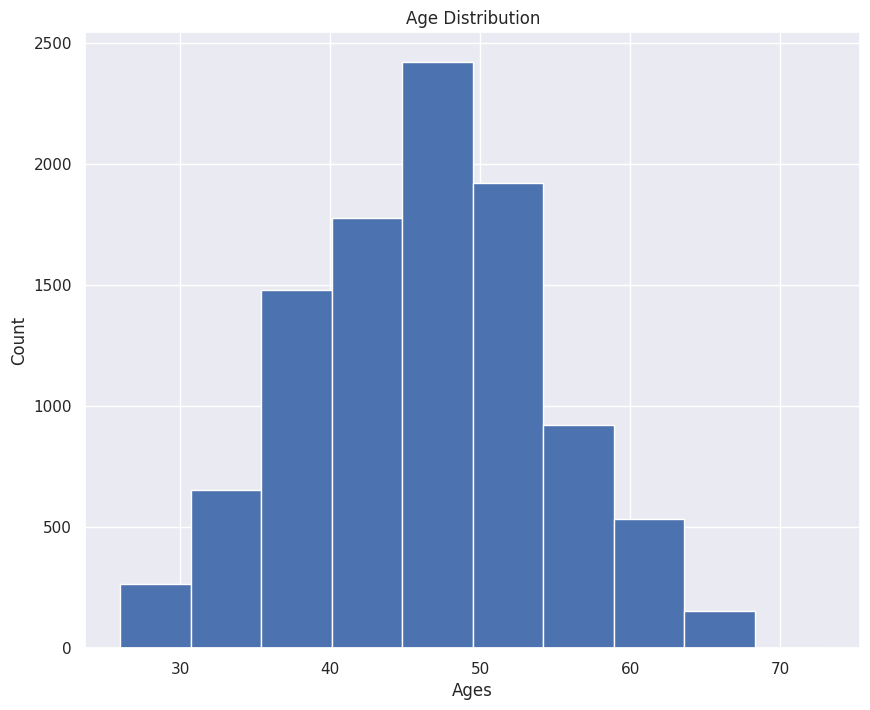

In [13]:
plt.figure(figsize=(10,8))
df['Customer_Age'].plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Age Distribution")
plt.xlabel("Ages")
plt.ylabel("Count")
plt.show()
plt.close()
# sự phân bổ nhóm tuổi khách hàng tập trung chủ yếu từ 40-55 tuổi

F    5358
M    4769
Name: Gender, dtype: int64


<ipython-input-14-2d5373ddcbd6>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-muted")


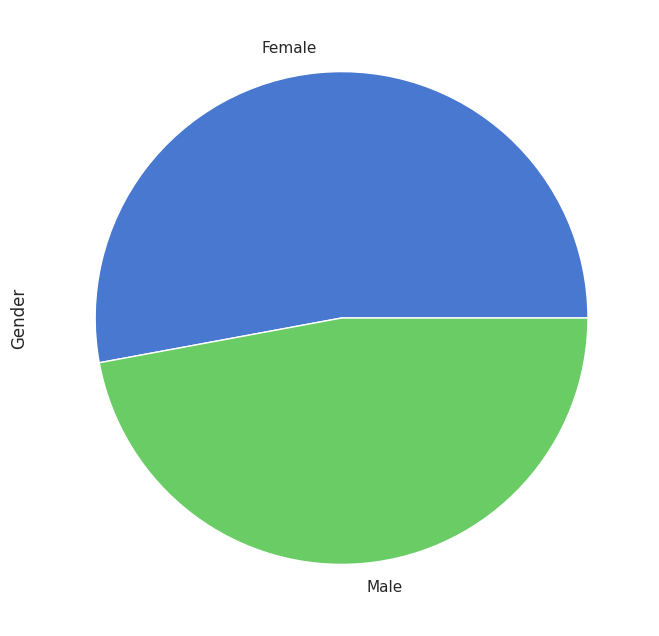

In [14]:
print(df['Gender'].value_counts())
plt.figure(figsize=(10,8))
df['Gender'].value_counts().plot(kind='pie', labels = ["Female", "Male"])
plt.style.use("seaborn-muted")
plt.show()
plt.close()
# Tỷ lệ khách hàng nữ chiếm nhiều hơn tỷ lệ khách hàng là nam

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


<ipython-input-15-fa29ebcf646f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-muted")


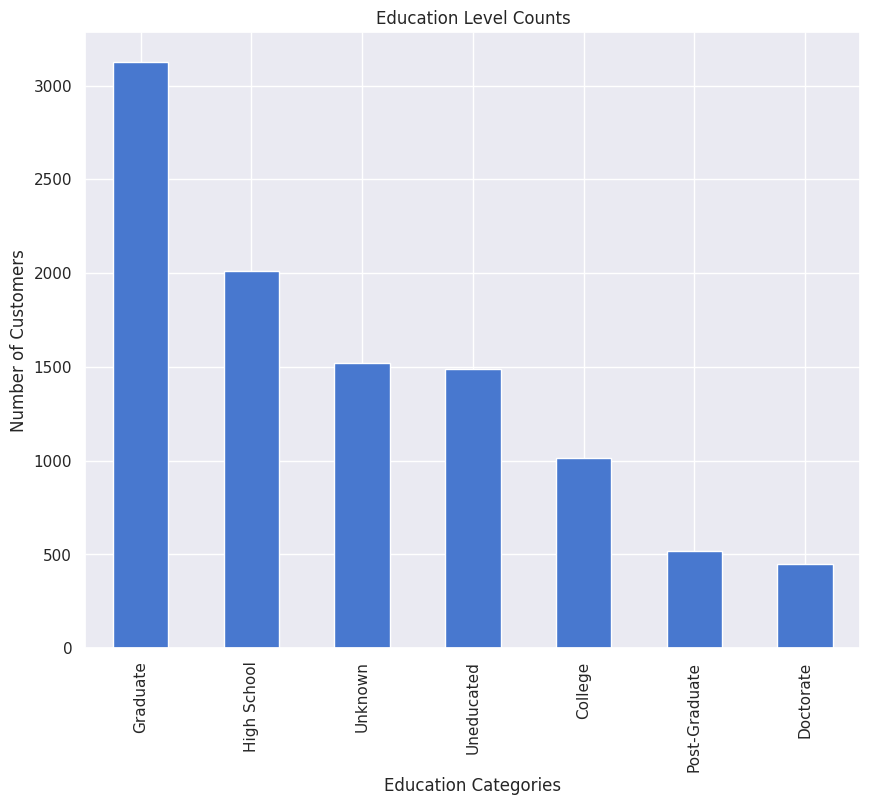

In [15]:
print(df['Education_Level'].value_counts())
plt.figure(figsize=(10,8))
df['Education_Level'].value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Education Level Counts")
plt.xlabel("Education Categories")
plt.ylabel("Number of Customers")
plt.show()
plt.close()
# Nhóm khách hàng trình độ Đại học chiếm đa số, nhưng nhóm khách hàng bậc tiến sĩ trở lên chiếm thiểu số

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


<ipython-input-16-648eb21f6aa0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-muted")


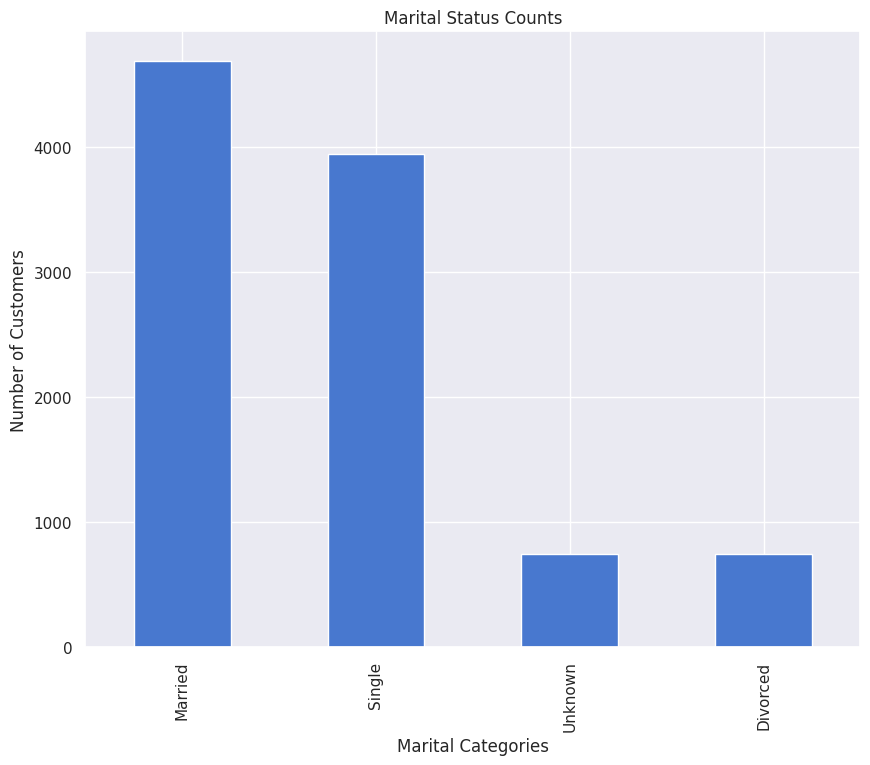

In [16]:
print(df['Marital_Status'].value_counts())
plt.figure(figsize=(10,8))
df['Marital_Status'].value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Marital Status Counts")
plt.xlabel("Marital Categories")
plt.ylabel("Number of Customers")
plt.show()
plt.close()
# Nhóm khách hàng có gia đình chiếm nhiều nhất. Nhóm khách hàng ly hôn và chưa xác định gần bằng nhau và chiếm ít nhất

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


<ipython-input-17-f2275ede2fc8>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-muted")


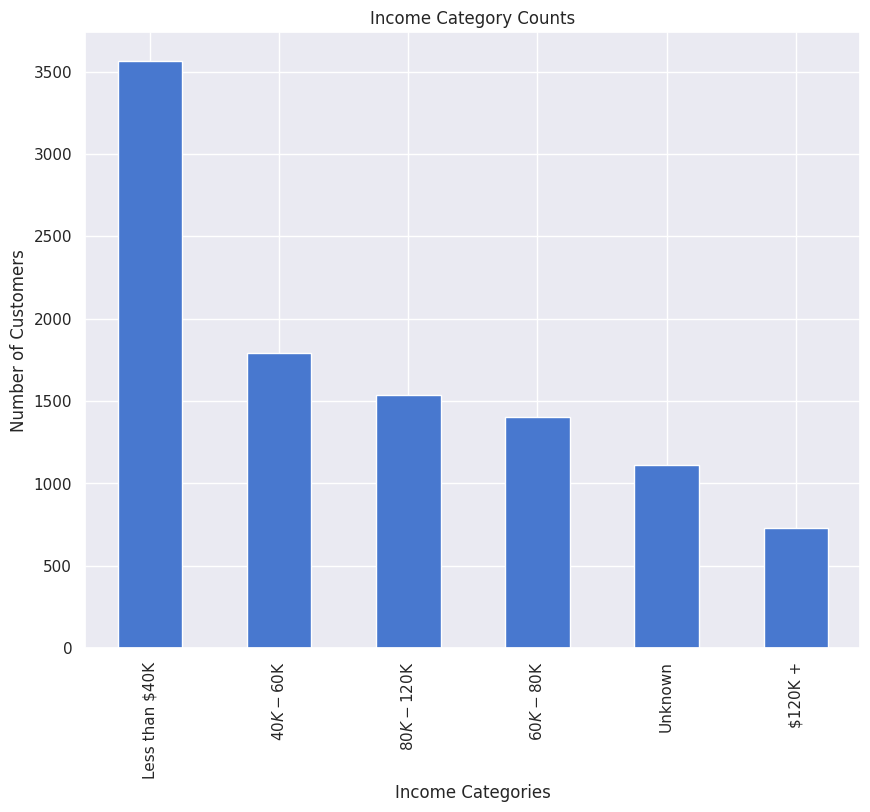

In [17]:
print(df['Income_Category'].value_counts())
plt.figure(figsize=(10,8))
df['Income_Category'].value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Income Category Counts")
plt.xlabel("Income Categories")
plt.ylabel("Number of Customers")
plt.show()
plt.close()
#Lượng khách hàng có thu nhập dưới 40K$/năm cao nhất

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


<ipython-input-18-30df0b69e1c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-muted")


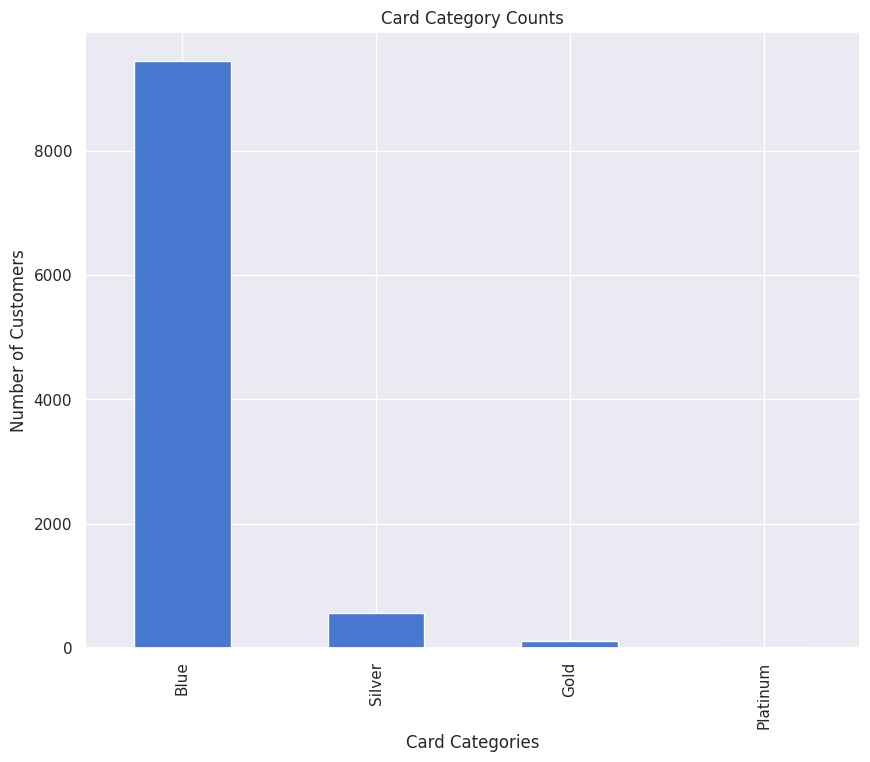

In [18]:
print(df['Card_Category'].value_counts())
plt.figure(figsize=(10,8))
df['Card_Category'].value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Card Category Counts")
plt.xlabel("Card Categories")
plt.ylabel("Number of Customers")
plt.show()
plt.close()
#Tệp khách hàng sử dụng hạng thẻ Blue chiếm đa số và rất ít khách hàng sở hữu hạng thẻ Platinum

<ipython-input-19-4cfb19706dbd>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-muted")


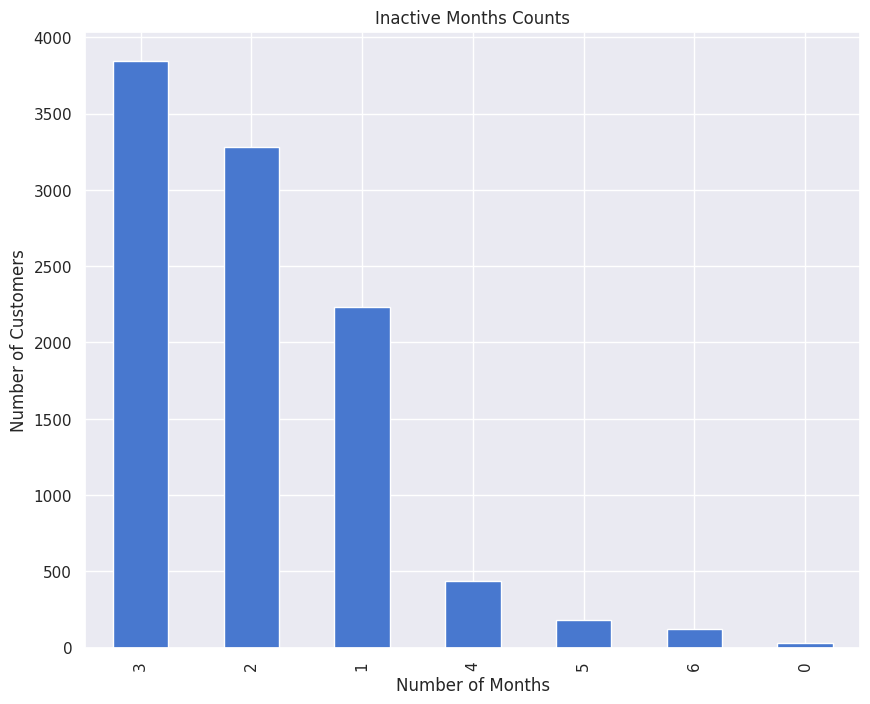

In [19]:
plt.figure(figsize=(10,8))
df['Months_Inactive_12_mon'].value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Inactive Months Counts")
plt.xlabel("Number of Months")
plt.ylabel("Number of Customers")
plt.show()
plt.close()

<ipython-input-20-0b54e5804c41>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-muted")


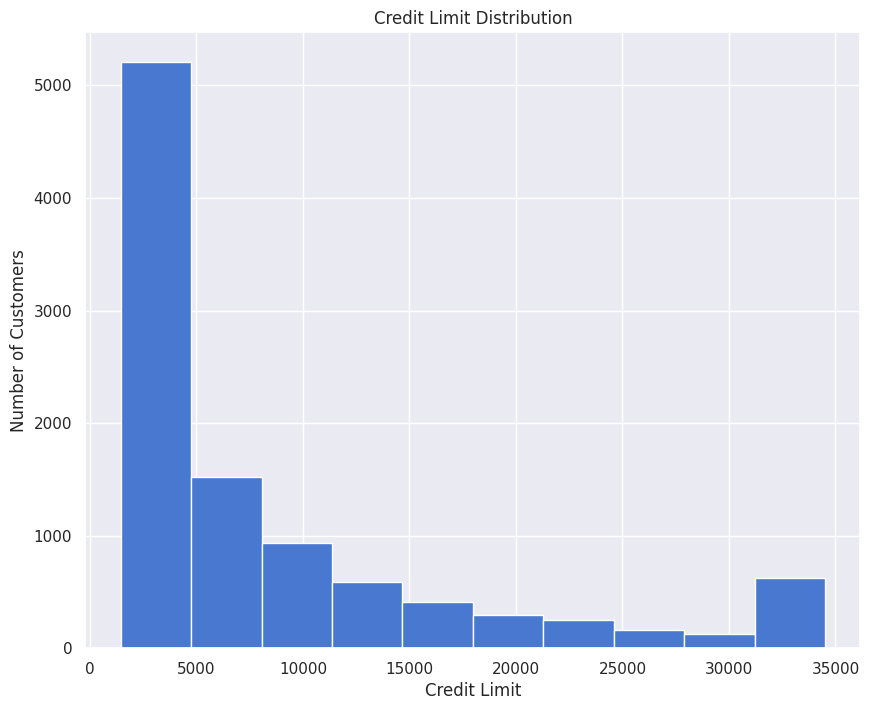

In [20]:
plt.figure(figsize=(10,8))
df['Credit_Limit'].plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Credit Limit Distribution")
plt.xlabel("Credit Limit")
plt.ylabel("Number of Customers")
plt.show()
plt.close()
#Hạng mức thẻ tín dụng phân bổ chủ yếu ở mức 2k$ - 5k$ và giảm dần tới 30k$. Tuy nhiên, số khách hàng có hạn mức thẻ 30k$-35k$ xấp sỉ bằng số khách hàng có hạn mức thẻ 10k$-15k$

# Label Encoder


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [22]:
# Chuyển đổi dữ liệu các cột sau sang số
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Education_Level'] = LabelEncoder().fit_transform(df['Education_Level'])
df['Marital_Status'] = LabelEncoder().fit_transform(df['Marital_Status'])
df['Income_Category'] = LabelEncoder().fit_transform(df['Income_Category'])
df['Card_Category'] = LabelEncoder().fit_transform(df['Card_Category'])
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,1,2,2,2,1,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,1,2,6,0,1,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,0,1,3,1,4,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,1,2,2,3,1,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# SVM


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [24]:
from sklearn.metrics import classification_report,precision_score,recall_score,accuracy_score

In [25]:
X = df.drop(['Attrition_Flag'],axis = 1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [26]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [27]:
svc.score(X_test,y_test)

0.8317535545023697

In [28]:
svc.score(X_train,y_train)

0.8418696510862409

In [29]:
pred = svc.predict(X_test)

In [30]:
#accuracy_score SVM khoảng 83%
print(classification_report(y_test,pred))

                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       426
Existing Customer       0.83      1.00      0.91      2106

         accuracy                           0.83      2532
        macro avg       0.42      0.50      0.45      2532
     weighted avg       0.69      0.83      0.76      2532



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print('accuracy_score',accuracy_score(y_test, pred))

accuracy_score 0.8317535545023697


# KNN


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
error_rate = []

#chọn số n cho mô hình KNeighborsClassifier(n_neighbors=......). Cho số n chạy từ 1 tới 39, để tìm số n phù hợp nhất
for i in range(1,40,3):
    
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print(i)
# Số 37 là số n phù hợp nhất. Ta thay số n = 37 vào KNeighborsClassifier(n_neighbors=37)

37


In [34]:
model= KNeighborsClassifier(n_neighbors=37)

In [35]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=37)

In [36]:
pred = model.predict(X_test)

In [37]:
print(confusion_matrix(y_test,pred))

[[   0  426]
 [   0 2106]]


In [38]:
#accuracy_score của KNN sấp xỉ 83%
print(classification_report(y_test,pred))

                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       426
Existing Customer       0.83      1.00      0.91      2106

         accuracy                           0.83      2532
        macro avg       0.42      0.50      0.45      2532
     weighted avg       0.69      0.83      0.76      2532



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
model.score(X_test,y_test)

0.8317535545023697

In [40]:
model.score(X_train,y_train)

0.8418696510862409

In [41]:
print('accuracy_score',accuracy_score(y_test, pred))

accuracy_score 0.8317535545023697


# RandomForest



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score

In [43]:
forest = RandomForestClassifier(n_estimators = 850, max_depth = 19, random_state = 1200)

In [44]:
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print('accuracy_score',accuracy_score(y_test, y_pred))
#accuracy_score của Randomforestclassifier sấp xỉ 96% => độ chính xác cao nhất trong 3 mô hình

accuracy_score 0.9648499210110585


# In Conclusion

In [51]:
models = pd.DataFrame({
    'Model': ['SVM','KNN','RandomForest'],
    'Accuracy Score': [ accuracy_score(y_test, pred), accuracy_score(y_test, pred), accuracy_score(y_test, y_pred)]
})

models.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score
2,RandomForest,0.964850
0,SVM,0.831754
1,KNN,0.831754


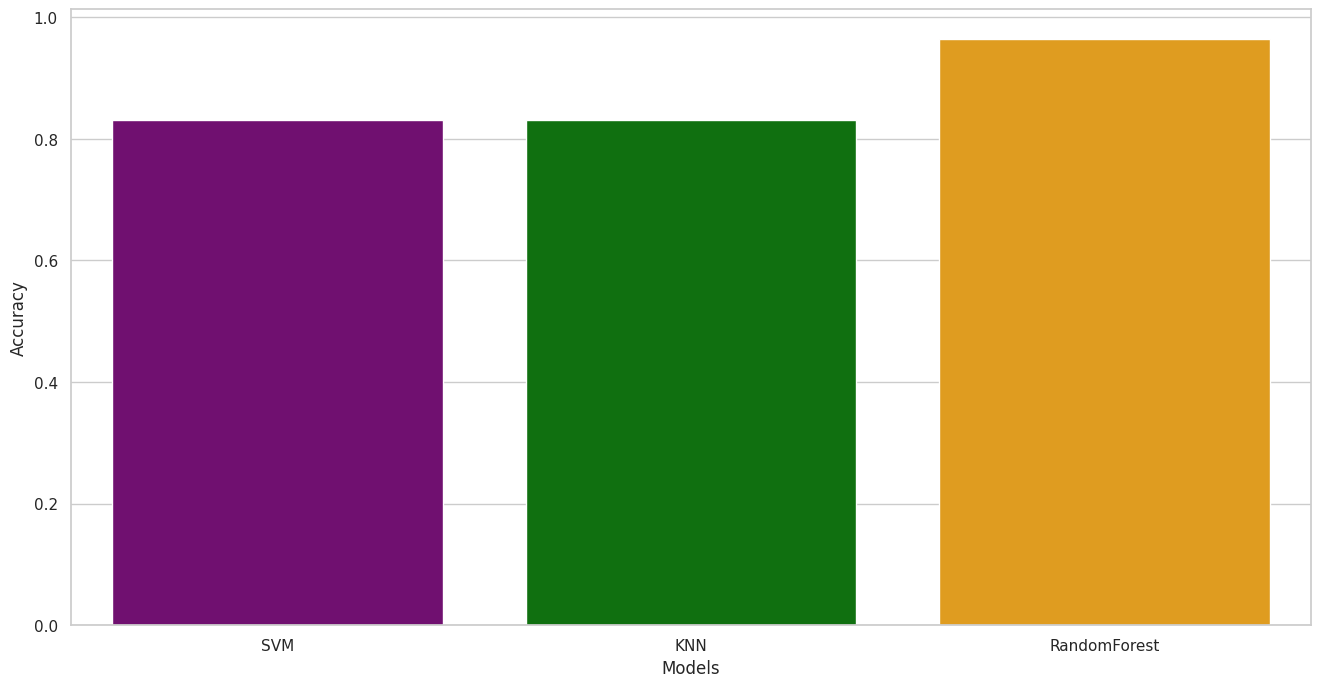

In [54]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
sns.barplot(x=models['Model'],y=models['Accuracy Score'], palette=colors )
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

We have successfully applied the knowlegdes what we learnt by trainers and mentor to find the best model machine learning for this Dataset.


And, in this case, RandomforestClassification gives the best result, approximately 96%. Meanwhile, both SVM and KNN give only 83%. Also, we caculate the churn rate that is 16%.


We suggest to choose RandomforestClassification model to solve this issue.